## **PSMDSBE 102 / Special Topics in Data Science**

### Pillazo, Johnny Boy G.

# Movie Review Sentiment Analysis

### In this project I am predicting the sentiment of a given text, if the text is positive, negative or neutral.

# Initializes Ray

In [1]:
import ray

# Initialize Ray
if ray.is_initialized():
    ray.shutdown()

In [2]:
ray.init()

2025-05-24 13:31:47,960	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.11
Ray version:,2.7.0
Dashboard:,http://127.0.0.1:8265


In [1]:
import ray

# Initialize Ray
if ray.is_initialized():
    ray.shutdown()

ray.init()

2025-05-24 02:01:08,339	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.11
Ray version:,2.7.0
Dashboard:,http://127.0.0.1:8265


In [3]:
ray.cluster_resources()

{'memory': 309888615.0,
 'node:127.0.0.1': 1.0,
 'object_store_memory': 154944307.0,
 'CPU': 8.0,
 'node:__internal_head__': 1.0}

In [4]:
num_workers = 14  # 16 CPU - 2 (head node + background)
resources_per_worker = {"CPU": 1, "GPU": 0}  # Allocate CPU per worker

In [5]:
ray.data.DatasetContext.get_current().execution_options.preserve_order = True
ray.data.DataContext.get_current().execution_options.verbose_progress = True

# HOA 1.1 - MLOps Design

# HOA 1.2 - Data Preparation to Distribution

### Importing necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
import re
import nltk
import string
import nlp_utils
import collections
import contractions
import nlp_utils as nu
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
# Loading data. 
with open('TextAnalytics.txt','r') as f:
    text = f.read()

## Text Normalization

In [10]:
# splitting at ( \n ).
text=text.split('\n')
# Separating at new line using '\n'  

In [11]:
# splitting at ( \t ).
corpus = [text]
for sent in text:
    corpus.append(sent.split('\t'))
# Splitting String by tab(\t)    

In [12]:
letters_only = re.sub(r'[^a-zA-Z]',  
                          " ",          
                          str(corpus))
# Taking only letters

## Tokenization

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# converting to lowercase.
letters_only=letters_only.lower()

token=nltk.sent_tokenize(letters_only)

## Alphanumeric characters

In [15]:
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token):
    tokens = nlp_utils.w_tokenization(token)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda = list(map(clean_nda,token))

### Alpha numeric characters and decimals have been replaced with characters

## Removing Contractions.

In [16]:
conm = contractions.CONTRACTION_MAP
def contraction_remove(corpus_nda):
    for key,value in conm.items():
        corpus_nda = re.sub(r"{}".format(key),'{}'.format(value),corpus_nda)
        
    return corpus_nda

special = string.punctuation
def w_tokenization(corpus_nda):
    # convert into lower case
    corpus_nda = corpus_nda.lower()
    # contraction
    corpus_nda = contraction_remove(corpus_nda)
    # 
    tokens = nltk.word_tokenize(corpus_nda) # word tokens
## contractions have been expanded and the letters have been converted to lowercase.    

In [17]:
data = [corpus_nda]
for sent in text:
    data.append(sent.split('\t'))
# Separating at tab     

In [18]:
data.append(sent.split('\n'))
# Separating at newline

In [19]:
#data
# Cleaned text

In [20]:
df = pd.DataFrame(data)
## Saving the data into a dataframe.

In [21]:
df

,0,1,2,3,4,5,6
0,one of the other reviewers has mentioned that ...,None,None,None,None,None,None
1,"0,""One of the other reviewers has mentioned th...",None,None,None,None,None,None
2,"1,""A wonderful little production. <br /><br />...",None,None,None,None,None,None
3,"2,""I thought this was a wonderful way to spend...",None,None,None,None,None,None
4,"3,""Basically there's a family where a little b...",None,None,None,None,None,None
...,...,...,...,...,...,...,...
997,"996,""I hated it. I hate self-aware pretentious...",None,None,None,None,None,None
998,"997,""I usually try to be professional and cons...",None,None,None,None,None,None
999,"998,""If you like me is going to see this in a ...",None,None,None,None,None,None
1000,"999,""This is like a zoology textbook, given th...",None,None,None,None,None,None


In [22]:
df.drop([1,2,3,4,5,6],axis=1,inplace=True)
# dropping unnecessary columns.

In [23]:
df
# Resulting dataframe.

,0
0,one of the other reviewers has mentioned that ...
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
...,...
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."
1000,"999,""This is like a zoology textbook, given th..."


In [24]:
df= df.rename(columns={0: 'Text'})
# Renaming the column 0 as 'Text'

#### Final Dataset.

In [25]:
df

,Text
0,one of the other reviewers has mentioned that ...
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
...,...
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."
1000,"999,""This is like a zoology textbook, given th..."


### Rows 0,1 and 1000 and 1001 have repeated hence needs to be cleaned.

In [26]:
df.drop(df.index[:1], inplace=True)
# row 1 has repeated so it is dropped.

In [27]:
df.drop(df.index[1000:], inplace=True)
# row 1000 has repeated aswell, so it is dropped.

In [28]:
df.head(10)

,Text
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
5,"4,""Petter Mattei's """"Love in the Time of Money..."
6,"5,""Probably my all-time favorite movie, a stor..."
7,"6,""I sure would like to see a resurrection of ..."
8,"7,""This show was an amazing, fresh & innovativ..."
9,"8,""Encouraged by the positive comments about t..."
10,"9,""If you like original gut wrenching laughter..."


### Removing additional characters present in the dataframe.

In [29]:
## We can further see that there are still some special characters in the dataframe which have to be treated.
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("< />", '', regex=True, inplace=True)

In [30]:
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip(')')
df['Text'] = df['Text'].str.strip('(')
## Using the strip function in order to delete the special characters.

In [31]:
df.head(10)

,Text
1,One of the other reviewers has mentioned that ...
2,A wonderful little production. The filming tec...
3,I thought this was a wonderful way to spend ti...
4,Basically theres a family where a little boy (...
5,Petter Matteis Love in the Time of Money is a ...
6,Probably my alltime favorite movie a story of ...
7,I sure would like to see a resurrection of a u...
8,This show was an amazing fresh & innovative id...
9,Encouraged by the positive comments about this...
10,If you like original gut wrenching laughter yo...


## Lemmatization of the text column

In [9]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
df['Text'] = df['Text'].apply(nu.lemmatization_sentence)

In [34]:
Text=df['Text']

In [35]:
token = Text.values

In [36]:
token=nltk.sent_tokenize(str(token))
## Sentence tokenization

In [37]:
data = np.array(token)
## Saving token in form of array

In [38]:
stop = stopwords.words('english')
## Saving stopwords in stop

In [39]:
#stop_words = set(stopwords.words("english"))

### Removing stopwords from the dataframe

In [40]:
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]

print(tokens_without_sw[:5])
## Removing stopwords from the text and printing the words without stopwords

['[', '``', '[', "'one", 'reviewer']


## Visualization

In [41]:
stopwords = set(stopwords.words("english"))
## Removing stopwords for wordcloud visualization

In [42]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
## WordCloud is a technique to show which words are the most frequent among the given text

### Visualizing the highest repeating words in the dataframe using  the wordcloud.

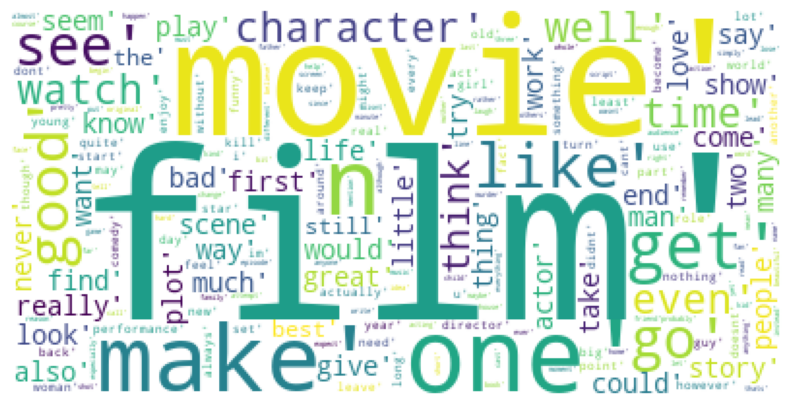

In [43]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting the number of times a word has repeated through out the data.

In [44]:
tokens_without_sw=(str(tokens_without_sw))

In [45]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
# Removing stopwords as creating two lists to display the words and their counts

In [46]:
counted_words.most_common(10)

[("'movie',", 2019),
 ("'film',", 1773),
 ("'one',", 980),
 ("'make',", 888),
 ("'see',", 856),
 ("'like',", 828),
 ("'get',", 751),
 ("'good',", 644),
 ("'go',", 542),
 ("'watch',", 541)]

## Visualizing top 10 repeated/common words using bar graph.

<BarContainer object of 10 artists>

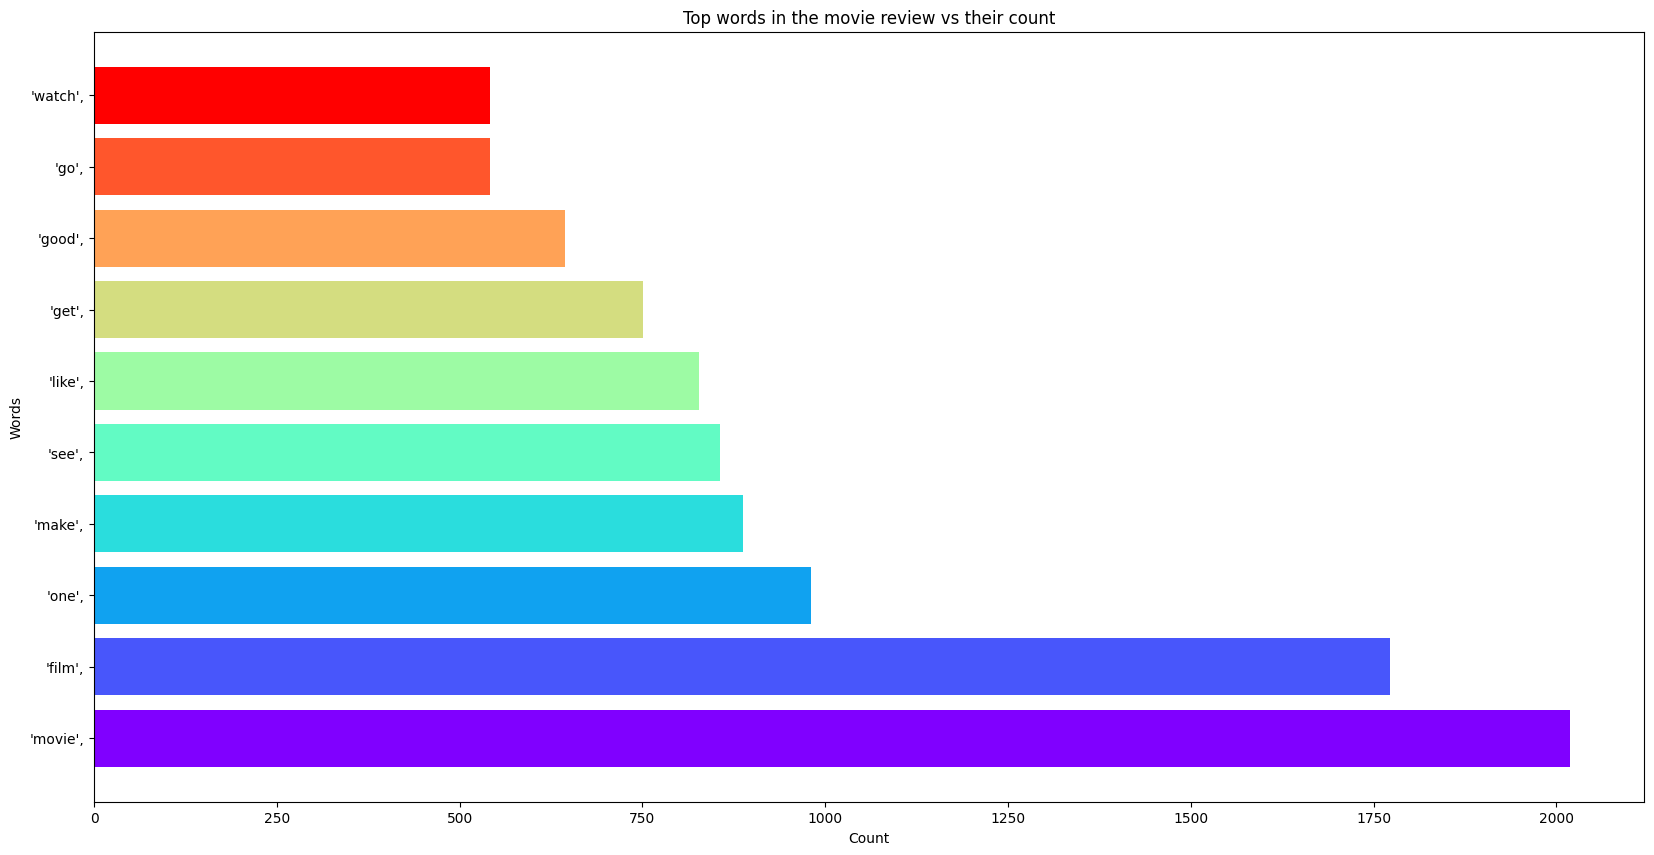

In [47]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the movie review vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

## Sentiment Analysis.

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
sentence = tokens_without_sw
tokenized_sentence = nltk.word_tokenize(sentence)

sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:        
        neu_word_list.append(word)                

#print('Positive:',pos_word_list)        
#print('Neutral:',neu_word_list)    
#print('Negative:',neg_word_list) 
#score = sid.polarity_scores(sentence)
#print('\nScores:', score)

In [51]:
#pos_word_list[:100]
#neg_word_list[:100]

### Top 100 Positive words.

In [52]:
print(list(iter(pos_word_list[:100]))) # These are the top 100 positive words found in the dataset.

["'trust", "'security", "'agreement", "'pretty", "'charm", "'romance", "'ready", "'well", "'comfortable", "'wonderful", "'comforting", "'well", "'truly", "'well", "'worth", "'great", "'comedy", "'dream", "'solid", "'play", "'well", "'wonderful", "'lighthearted", "'comedy", "'well", "'laugh", "'comedy", "'impress", "'sexy", "'spirited", "'jewel", "'interesting", "'great", "'comedy", "'thriller", "'like", "'thriller", "'well", "'play", "'love", "'stunning", "'success", "'play", "'sophisticated", "'best", "'sincere", "'good", "'talented", "'wish", "'good", "'luck", "'await", "'favorite", "'noble", "'truly", "'sympathetic", "'delight", "'like", "'fun", "'sure", "'like", "'excitement", "'heros", "'thank", "'like", "'nice", "'amazing", "'fresh", "'innovative", "'funny", "'truly", "'entertaining", "'original", "'fit", "'respect", "'original", "'huge", "'success", "'encourage", "'positive", "'truly", "'play", "'happy", "'credit", "'best", "'like", "'original", "'laughter", "'like", "'love", "'

### Top 100 Negative words.

In [53]:
print(list(iter(neg_word_list[:100]))) # These are the top 100 negative words found in the dataset.

["'strike", "'violence", "'timid", "'violence", "'prison", "'death", "'dodgy", "'forget", "'forget", "'forget", "'mess", "'strike", "'nasty", "'violence", "'violence", "'injustice", "'kill", "'prison", "'bitch", "'lack", "'prison", "'uncomfortable", "'discomforting", "'disappear", "'terribly", "'suspect", "'killer", "'disappoint", "'risk", "'devil", "'fight", "'kill", "'argue", "'ruin", "'meaningless", "'ignore", "'loneliness", "'anxiously", "'bore", "'startle", "'doubt", "'drop", "'waste", "'painfully", "'bad", "'bad", "'hard", "'awful", "'bad", "'mistake", "'bad", "'awful", "'lame", "'nasty", "'bore", "'obsessive", "'hell", "'odd", "'low", "'problem", "'lose", "'scary", "'helplessly", "'horror", "'die", "'scary", "'cry", "'kill", "'warn", "'cry", "'badass", "'complain", "'evil", "'mad", "'cry", "'disappoint", "'fight", "'cry", "'reek", "'annoying", "'shoot", "'ruin", "'cut", "'prisoner", "'bad", "'sorrow", "'bizarre", "'hard", "'ridiculous", "'nonsense", "'stereotyped", "'bad", "'was

## Vader sentiment analysis for a given (Sentence) if positive, negative or  neutral in nature.

In [54]:
sid = SentimentIntensityAnalyzer()

# Print only the first 10 sentences
for i, sentence in enumerate(Text):
    print(f"\nSample {i+1}: {sentence}") 
    
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print(f"{k}: {ss[k]:.2f}, ", end="")
    print()
    
    if i == 9: 
        break


Sample 1: one of the other reviewer have mention that after watch just oz episode youll be hook they be right a this be exactly what happen with me.the first thing that strike me about oz be it utality and unflinching scene of violence which set in right from the word go trust me this be not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it be hardcore in the classic use of the word.it be call oz a that be the nickname give to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy be not high on the agenda em city be home to many .. aryan muslim gangstas latinos christian italian irish and more .... so scuffles death stare dodgy dealing and shady agreement be never far away.i would say the main appeal of the show be due to the fact that it go where other show wouldnt dare forget pretty picture paint for mainstre

### Converting all Polarity scores and sentences into a dataframe.

In [55]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [56]:
df.head(10)

,Text,neg,neu,pos,compound
1,one of the other reviewer have mention that af...,0.187,0.748,0.064,-0.9933
2,a wonderful little production the filming tech...,0.050,0.758,0.192,0.9739
3,i think this be a wonderful way to spend time ...,0.107,0.657,0.236,0.9748
4,basically theres a family where a little boy j...,0.144,0.782,0.074,-0.9080
5,petter matteis love in the time of money be a ...,0.054,0.792,0.154,0.9744
6,probably my alltime favorite movie a story of ...,0.022,0.761,0.217,0.9803
7,i sure would like to see a resurrection of a u...,0.024,0.857,0.118,0.9246
8,this show be an amazing fresh innovative idea ...,0.155,0.674,0.171,0.3327
9,encourage by the positive comment about this f...,0.166,0.668,0.166,0.2362
10,if you like original gut wrench laughter you w...,0.100,0.524,0.376,0.8910


## Arranging the dataset in descending order based on (Compound score) to find the most important sentence from the given data.

In [57]:
imp_sent=df.sort_values(by='compound', ascending=False)
## arranging the compound column in descending order to find the best sentence. 

In [58]:
imp_sent 

,Text,neg,neu,pos,compound
411,i firmly believe that the best oscar ceremony ...,0.062,0.598,0.339,0.9998
567,few would argue that master animation director...,0.039,0.727,0.234,0.9996
211,i have just give a for thief highway i mention...,0.095,0.618,0.288,0.9993
364,the plot michael linnett connors have do every...,0.021,0.807,0.173,0.9992
944,a film for mature educate audience ... i saw r...,0.072,0.674,0.254,0.9989
...,...,...,...,...,...
354,this film hold my interest enough to watch it ...,0.201,0.683,0.116,-0.9980
825,mexican werewolf in texas be set in the small ...,0.226,0.695,0.079,-0.9985
247,this show make absolutely no sense every week ...,0.372,0.575,0.053,-0.9987
766,this film cant make up it mind whether it mess...,0.265,0.627,0.108,-0.9988


In [59]:
print(df['Text'].iloc[410] ) # sentence with index 410 has the highest compound score 
                             # and hence it is the most important sentence among all the sentences.

i firmly believe that the best oscar ceremony in recent year be in for two reason host steve martin be at his most witty i saw the teamster help michael moore into the trunk of his limo and ill good not mention the gay mafia in case i wake up with a poodle head in my bed surprise winners no one have adrien brody down for best actor genuine applause or roman polanski for best director genuine jeer and boo but they win last year award ceremony wasnt too bad but there be little in the way of surprise and i be happy to see return of the king sweep the award even if it wasnt the best in the trilogy fellowship be much good but what let the bbc coverage down be jonathan ross get a few of his sycophantic mate round and pretend they be hilarious when they be anything but so when i hear sky be do the coverage for british tv i be expect barry norman and mark kermode to be do the link but instead we end up with jamie theakston and sharon osbourne oh gawd if british tv be desperate for film critic 

## Finding top positive sentence in the data.

In [60]:
pos_sent=df.sort_values(by='pos', ascending=False)
## Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [61]:
pos_sent

,Text,neg,neu,pos,compound
161,mystery men have get to be the stupid film ive...,0.104,0.431,0.466,0.9890
10,if you like original gut wrench laughter you w...,0.100,0.524,0.376,0.8910
322,i have watch this movie countless time and nev...,0.000,0.651,0.349,0.9827
979,i suppose for this film be suppose to be cool ...,0.024,0.630,0.346,0.9961
931,i catch this on television one day when i be y...,0.073,0.586,0.340,0.9914
...,...,...,...,...,...
340,i find the critique of many imdb user a little...,0.135,0.857,0.007,-0.9628
756,a wellmade runofthemill movie with a tragic en...,0.127,0.873,0.000,-0.7906
997,i hat it i hate selfaware pretentious inanity ...,0.210,0.790,0.000,-0.9371
414,a rating of do not begin to express how dull d...,0.404,0.596,0.000,-0.8316


In [62]:
print(df['Text'].iloc[160] ) # sentence with index 160 has the highest positive score and is the most postive. 

mystery men have get to be the stupid film ive ever see but what a film i think it be fabulous excellent and impressive it be funny welldone and nice to see ridiculous super hero for a change and be able to pull it off this be great ill definitely watch it again


## Finding top negative sentence in the data.

In [63]:
neg_sent=df.sort_values(by='neg', ascending=False)
## Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [64]:
neg_sent

,Text,neg,neu,pos,compound
414,a rating of do not begin to express how dull d...,0.404,0.596,0.000,-0.8316
247,this show make absolutely no sense every week ...,0.372,0.575,0.053,-0.9987
737,baba rajinikanth will never forget this name i...,0.370,0.603,0.027,-0.9960
282,after a very scary crude open which give you t...,0.340,0.603,0.057,-0.9904
98,well i like to watch bad horror bmovies cause ...,0.314,0.549,0.136,-0.9816
...,...,...,...,...,...
677,i have to say this be my favorite movie of all...,0.000,0.790,0.210,0.9080
288,i saw this movie last night and think it be de...,0.000,0.806,0.194,0.9676
470,although the plot of this film be a bit farfet...,0.000,0.716,0.284,0.9545
292,i have some reservation about this movie i fig...,0.000,0.843,0.157,0.9501


In [65]:
print(df['Text'].iloc[413] )# sentence with index 413 has the highest negative score and is the most negative sentence 

a rating of do not begin to express how dull depressing and relentlessly bad this movie be


In [66]:
sentences=df

## Giving threshold values to classify if a given sentence is positive, negative or neutral in nature.

In [67]:
#Assigning score categories and logic
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(sentences)):
    if ((sentences.iloc[i]['compound'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((sentences.iloc[i]['compound'] > 0) & (sentences.iloc[i]['compound'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((sentences.iloc[i]['compound'] <= 0)):
        predicted_value.append('negative')
        i = i+1
## The threshold value will categorize if a given sentence is positive negative or neutral in nature.        

In [68]:
predicted_value_df = pd.Series(predicted_value)

print(predicted_value_df.head(10))

0    negative
1    positive
2    positive
3    negative
4    positive
5    positive
6    positive
7     neutral
8     neutral
9    positive
dtype: object


### Adding the target or sentiment column to our data frame.

In [69]:
df['Target'] = predicted_value 
## A new column has been created called as 'Target' with sentiments assigned to a given text.

In [70]:
df.head()

,Text,neg,neu,pos,compound,Target
1,one of the other reviewer have mention that af...,0.187,0.748,0.064,-0.9933,negative
2,a wonderful little production the filming tech...,0.050,0.758,0.192,0.9739,positive
3,i think this be a wonderful way to spend time ...,0.107,0.657,0.236,0.9748,positive
4,basically theres a family where a little boy j...,0.144,0.782,0.074,-0.9080,negative
5,petter matteis love in the time of money be a ...,0.054,0.792,0.154,0.9744,positive


### Removing/dropping the 'neg', 'neu', 'pos', and 'compound' columns.

In [71]:
df.drop(['neg','neu','pos','compound'],axis=1,inplace=True)
## Dropping the neg, neu, pos, and compound columns.

In [72]:
df
## Final dataframe with sentiments.

,Text,Target
1,one of the other reviewer have mention that af...,negative
2,a wonderful little production the filming tech...,positive
3,i think this be a wonderful way to spend time ...,positive
4,basically theres a family where a little boy j...,negative
5,petter matteis love in the time of money be a ...,positive
...,...,...
996,nothing be sacred just ask ernie fosselius the...,negative
997,i hat it i hate selfaware pretentious inanity ...,negative
998,i usually try to be professional and construct...,negative
999,if you like me be go to see this in a film his...,negative


In [73]:
df.to_csv("TextAnalytics_cleaned.csv", index=False)

In [74]:
df['Target'].value_counts()
### There are 560 positive, 372 negative and 68 neutral columns present in the dataset.

Target
positive    560
negative    372
neutral      68
Name: count, dtype: int64

In [75]:
cat_cols=['Target']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes
### Label Encoding the target column.

Text      object
Target     int32
dtype: object

In [76]:
df['Target'].value_counts()
## Label encoded value_counts()

Target
2    560
0    372
1     68
Name: count, dtype: int64

In [77]:
df

,Text,Target
1,one of the other reviewer have mention that af...,0
2,a wonderful little production the filming tech...,2
3,i think this be a wonderful way to spend time ...,2
4,basically theres a family where a little boy j...,0
5,petter matteis love in the time of money be a ...,2
...,...,...
996,nothing be sacred just ask ernie fosselius the...,0
997,i hat it i hate selfaware pretentious inanity ...,0
998,i usually try to be professional and construct...,0
999,if you like me be go to see this in a film his...,0


In [78]:
# Vectorizing training data. 
tfidf = TfidfVectorizer() 
X = tfidf.fit_transform(df['Text'])
Y = df['Target']
## Applying Tf-Idf vectorizer on the Text column.

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
### Splitting the dataset.

(800, 16177) (200, 16177) (800,) (200,)


### Logistic Regression

In [80]:
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train 
train_preds = log_reg.predict(X_train)

#predict on test
test_preds = log_reg.predict(X_test)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

## Decision Tree Classifier

In [82]:
DT = DecisionTreeClassifier().fit(X,Y)

In [83]:
#predict on train 
train_preds2 = DT.predict(X_train)

#predict on test
test_preds2 = DT.predict(X_test)

## Random Forest Classifier

In [84]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds3 = RF.predict(X_train)

#predict on test
test_preds3 = RF.predict(X_test)

## KNeighbors Classifier

In [85]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(X_train)

#predict on test
test_preds4 = KNN.predict(X_test)

## Support Vector Machine

In [86]:
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds5 = SVM.predict(X_train)

#predict on test
test_preds5 = SVM.predict(X_test)

In [87]:
print("-----Logistic Regression-----")
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print()
print()


print("-----Decision Tree Classifier-----")
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)
# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))
print()
print()


print("-----Random Forest Classifier-----")
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)
# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)
print()
print()


print("-----KNeighbors Classifier-----")
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)
# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)
print()
print()


print("-----Support Vector Machine-----")
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)
# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))
print('-'*50)

-----Logistic Regression-----
Model accuracy on train is:  0.90875
Model accuracy on test is:  0.615


-----Decision Tree Classifier-----
Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[288   0   0]
 [  0  59   0]
 [  0   0 453]]
confusion_matrix test is:  [[ 84   0   0]
 [  0   9   0]
 [  0   0 107]]
Wrong predictions out of total
--------------------------------------------------
0 / 200
--------------------------------------------------
KappaScore is:  1.0


-----Random Forest Classifier-----
Model accuracy on train is:  1.0
Model accuracy on test is:  0.61
--------------------------------------------------
confusion_matrix train is:  [[288   0   0]
 [  0  59   0]
 [  0   0 453]]
confusion_matrix test is:  [[ 18   0  66]
 [  0   0   9]
 [  3   0 104]]
Wrong predictions out of total
--------------------------------------------------
78 / 200
----------------------------------------------

### Observations

**Logistic Regression**

* Train Accuracy: 90.8%
* Test Accuracy: 61.5%
* The accuracy could be better.

**Decision Tree**

* Train Accuracy: 100%
* Test Accuracy: 100%
* Overfitting: The model memorizing the training data.

**Random Forest**

* Train Accuracy: 100%
* Test Accuracy: 62%
* Still overfitting, but performs slightly better than Logistic Regression.

**K-Nearest Neighbors (KNN)**

* Train Accuracy: 70.8%
* Test Accuracy: 56.5%
* Underfitting! The model struggles to capture patterns.

**Support Vector Machine (SVM - Linear Kernel)**

* Train Accuracy: 94.2%
* Test Accuracy: 70.5%
* Best performing model. It balances generalization and accuracy well.

In [ ]:
# Load Data into Ray Dataset
df = pd.read_csv("TextAnalytics.txt", names=["Text"])
ds = ray.data.from_pandas(df)

In [94]:
ds = ds.random_shuffle(seed=1234)

NameError: name 'ds' is not defined

In [ ]:
df["Sentiment"] = df["Text"].apply(lambda x: "neutral" if len(x) < 50 else ("positive" if "good" in x else "negative"))

train_df, val_df = train_test_split(df, stratify=df["Sentiment"], test_size=0.2, random_state=1234)

In [ ]:
train_ds = ray.data.from_pandas(train_df)
val_ds = ray.data.from_pandas(val_df)

In [ ]:
def preprocess(batch):
    batch["Text"] = batch["Text"].str.lower()
    batch["Text"] = batch["Text"].str.replace(r"\d+", "", regex=True)
    batch["Text"] = batch["Text"].str.replace(r"[^\w\s]", "", regex=True)
    return batch

In [93]:
train_ds = train_ds.map_batches(preprocess, batch_format="pandas")
val_ds = val_ds.map_batches(preprocess, batch_format="pandas")

NameError: name 'train_ds' is not defined

In [84]:
train_df = train_ds.to_pandas()
train_df["Sentiment"].head(10)

2025-04-25 23:16:02,928	INFO streaming_executor.py:104 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(preprocess)]
2025-04-25 23:16:02,929	INFO streaming_executor.py:105 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=True)


- MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

0    negative
1    negative
2    positive
3    positive
4    positive
5    negative
6    negative
7    positive
8    negative
9    negative
Name: Sentiment, dtype: object

In [ ]:
#ray.shutdown()

# HOA 2.1 - using OPENAI Key

In [ ]:
pip install openai

In [75]:
import os
import openai

In [79]:
# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "SECRET"
openai.api_key = os.getenv("OPENAI_API_KEY")

In [77]:
def gpt_sentiment_analysis(text):
    prompt = f"""Please analyze the sentiment of the following movie review and respond with only one word: Positive, Negative, or Neutral.\n\nReview:\n{text}"""

    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a sentiment analysis assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=1,
            temperature=0.0
        )
        sentiment = response.choices[0].message["content"].strip()
        return sentiment
    except Exception as e:
        print(f"Error: {e}")
        return "Error"

In [99]:
df_renamed = df.rename(columns={"Target": "NLTK Label"})
df_sample = df_renamed.sample(20, random_state=42).copy()
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
df_sample["NLTK_Sentiment"] = df_sample["NLTK Label"].map(label_map)
df_sample

,Text,NLTK Label,NLTK_Sentiment
522,one of the best ensemble acted film ive ever s...,2,Positive
738,write by oliver stone and direct by brian de p...,0,Negative
741,what a waste of talent a very poor semicoheren...,0,Negative
661,i be never so bored in my life hour of pretent...,0,Negative
412,while in a plane flick through the large choic...,2,Positive
679,adenoid hynkel a lowly soldier in world war on...,2,Positive
627,if you havent see this yet you really should o...,2,Positive
514,the story and the show be good but it be reall...,2,Positive
860,this be a stereotype plot a young fighter try ...,0,Negative
137,i find it very intrigue that lee radziwill jac...,2,Positive


In [100]:
# Add a blank column for GPT sentiment
df_sample['GPT_Sentiment'] = df_sample['Text'].apply(gpt_sentiment_analysis)

In [101]:
# Create comparison DataFrame
df_comparison = df_sample[["Text", "NLTK_Sentiment", "GPT_Sentiment"]]
df_comparison.reset_index(drop=True, inplace=True)

## Comparison of results of NLTK and GPT Sentiment.

In [104]:
pd.set_option('display.max_colwidth', None)
display(df_comparison)

,Text,NLTK_Sentiment,GPT_Sentiment
0,one of the best ensemble acted film ive ever see there isnt much to the plot but the act incredible you see the character change ever so subtly undr the influence of the rented villa in italy and love and happiness the film cast a mesmerizing spell on you much a the villa do on all the woman truly enchant,Positive,Positive
1,write by oliver stone and direct by brian de palma scarface paint a picture not easily forget al pacino turn in a stunning performance a tony montana a cuban refugee than become a powerful player in the drug world a he ruthlessly run his self make kingdom of crime in florida this gangster flick be harsh violent loud gross unpleasant and must hold the record for utter the word fk the most number of time almost three hour long and yes it can get repulsive a stout hearted constitution keep you in your seat cheer for the demise of a ruthless crime lord.also play interesting character be michelle pfeiffer steven bauer robert loggia mary elizabeth mastrantonio f. murray aaham and angel salazar pacino prove to be one of the great of his generation he manage to ing reality to his character that leave a strong impression this will not be a movie for everyone for you leave think you walk away from a disaster be that powerful enough for you crime do not pay for long,Negative,Positive
2,what a waste of talent a very poor semicoherent script cripple this film rather unimaginative direction too some very faint echo of _fargo_ here but it just doesnt come off,Negative,Negative
3,i be never so bored in my life hour of pretentious selfobsessed heroinaddicted basket case lounge around whine about their problem it like watching lizard molt even the sex scene will induce a serious case of narcolepsy if you have insomnia rent this,Negative,Negative
4,while in a plane flick through the large choice of movie i come across live almost accidentally oh boy what a choice.i remember vaguely see the trailer over a year ago and completely forget about it expect no more than another cheesy nonsense movie about a stupid reality show now i can easily say this have be a hell of a ride i dont remember last time i have be so excited terrify not sure if it be the high altitude play with my sens but the suspense grow gradually through the movie until reach a climax where you cant turn away from the screen literally sit on the edge of your seat and bite the remain nail youve got.you will first go through a personal moral assessment of where you stand about the righteousness of the show you will drift from think how come the human be can be so vicious to why not after all .ask yourself would you do it then learn about the contestant their motif and start guess you will then watch contestant pull the trigger one by one and get excite even though you know the first candidate be safe.good act good directing with a movie experience that remind you those old movie where you know what would happen in the next scene but still be crave for more spoiler couple of thing i would have change the casting of the contestant i have really be move by the farmer and we should have have a bit more like him the idea of a rich writer who want to be famous be a bit stupid it felt like you didnt care about some of the contestant although this might have be do on purpose i think the audience should have be able to associate with the majority of the contestant game rule a big glitch what happen if the th contestant doesnt die when he pull the trigger do you seriously think the last standing guy will pull the trigger and execute himself they should have give a chance to all contestant to live ie if th be a blank too then no one dies.interestingly i havent be bother too much by this bad point cause i really have a good time just wish i have some popcorn with me,Positive,Positive
5,adenoid hynkel a lowly soldier in world war one rise in subsequent year to become the ruthless dictator of toumania he create an aggressive antisemitic war m

# HOA 2.1 - PyTorch

In [113]:
#ray.shutdown()

Setup the Libraries

In [12]:
import ray
import pandas as pd
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pad_sequence
from ray.train.torch import TorchTrainer, prepare_model
from ray.air.config import ScalingConfig, RunConfig, CheckpointConfig
from ray.train import get_dataset_shard
from ray.air import session
from ray.train import Checkpoint
from ray.train.torch import TorchCheckpoint

Start Ray

In [ ]:
#if ray.is_initialized():
    #ray.shutdown()
#ray.init()

In [ ]:
#ray.cluster_resources()

In [4]:
#num_workers = 14  # 16 CPU - 2 (head node + background)
#resources_per_worker = {"CPU": 2, "GPU": 0}  # Allocate CPU per worker

In [5]:
#ray.data.DatasetContext.get_current().execution_options.preserve_order = True
#ray.data.DataContext.get_current().execution_options.verbose_progress = True

Load the clean dataset

In [13]:
df = pd.read_csv("TextAnalytics_cleaned.csv")
df = df.head(250)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Target'])

In [14]:
df

,Text,Target,label
0,one of the other reviewer have mention that af...,negative,0
1,a wonderful little production the filming tech...,positive,2
2,i think this be a wonderful way to spend time ...,positive,2
3,basically theres a family where a little boy j...,negative,0
4,petter matteis love in the time of money be a ...,positive,2
...,...,...,...
245,i have see this film at least time and i be st...,positive,2
246,this show make absolutely no sense every week ...,negative,0
247,this movie be so bad it be funny for awhile th...,negative,0
248,meryl streep be such a genius well at least a ...,positive,2


Convert to Ray Dataset

In [15]:
ds = ray.data.from_pandas(df[['Text', 'label']])
ds = ds.random_shuffle(seed=42)
train_ds, val_ds = ds.train_test_split(test_size=0.2, seed=42)

RayTaskError(ModuleNotFoundError): [36mray::get_table_block_metadata()[39m (pid=14788, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 1616, in ray._raylet.execute_task
  File "C:\Users\Administrator\Desktop\Special Topics in Data Science\PSMDSBE102\venv\lib\site-packages\ray\data\_internal\util.py", line 512, in get_table_block_metadata
    return BlockAccessor.for_block(table).get_metadata(
  File "C:\Users\Administrator\Desktop\Special Topics in Data Science\PSMDSBE102\venv\lib\site-packages\ray\data\block.py", line 379, in for_block
    _check_pyarrow_version()
  File "C:\Users\Administrator\Desktop\Special Topics in Data Science\PSMDSBE102\venv\lib\site-packages\ray\data\_internal\util.py", line 78, in _check_pyarrow_version
    from pkg_resources._vendor.packaging.version import parse as parse_version
ModuleNotFoundError: No module named 'pkg_resources._vendor'

In [162]:
# Load tokenizer once
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [163]:
def preprocess(batch):
    texts = [str(x) for x in batch["Text"]]
    labels = batch["label"].tolist()

    tokens = tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="np"
    )

    return {
        "results": [
            {
                "input_ids": tokens["input_ids"][i],
                "attention_mask": tokens["attention_mask"][i],
                "label": labels[i]
            }
            for i in range(len(texts))
        ]
    }

In [164]:
train_ds = train_ds.map_batches(preprocess, batch_format="pandas")
val_ds = val_ds.map_batches(preprocess, batch_format="pandas")

In [92]:
def custom_collate_fn(batch):
    if isinstance(batch, dict) and "results" in batch:
        batch = batch["results"]

    if not isinstance(batch[0], dict):
        raise TypeError(f"Expected batch of dicts but got: {type(batch[0])}, value: {batch[0]}")

    input_ids = [torch.tensor(x["input_ids"], dtype=torch.long) for x in batch]
    attention_masks = [torch.tensor(x["attention_mask"], dtype=torch.long) for x in batch]
    labels = torch.tensor([x["label"] for x in batch], dtype=torch.long)

    return {
        "input_ids": pad_sequence(input_ids, batch_first=True, padding_value=0),
        "attention_mask": pad_sequence(attention_masks, batch_first=True, padding_value=0),
        "labels": labels
    }

In [93]:
class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, 3)  # 3 classes

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)
        return self.fc(self.dropout(pooled_output))

In [94]:
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [95]:
def train_loop_per_worker(config):
    import os
    import random
    import numpy as np

    def set_seeds(seed=42):
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        os.environ["PYTHONHASHSEED"] = str(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Now safe to call
    set_seeds()

    dropout_p = config["dropout_p"]
    lr = config["lr"]
    lr_factor = config["lr_factor"]
    lr_patience = config["lr_patience"]
    num_epochs = config["num_epochs"]
    batch_size = config["batch_size"]
    num_classes = config["num_classes"]

    train_ds = get_dataset_shard("train")
    val_ds = get_dataset_shard("val")

    model = prepare_model(BertClassifier())  # your BertClassifier
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=lr_factor, patience=lr_patience)
    criterion = nn.CrossEntropyLoss()

    batch_size_per_worker = batch_size // session.get_world_size()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in train_ds.iter_torch_batches(batch_size=batch_size_per_worker, collate_fn=custom_collate_fn):
            optimizer.zero_grad()
            output = model(batch["input_ids"], batch["attention_mask"])
            loss = criterion(output, batch["labels"])
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_ds.iter_torch_batches(batch_size=batch_size_per_worker, collate_fn=custom_collate_fn):
                output = model(batch["input_ids"], batch["attention_mask"])
                loss = criterion(output, batch["labels"])
                val_loss += loss.item()

        scheduler.step(val_loss)

        metrics = {
            "epoch": epoch + 1,
            "lr": optimizer.param_groups[0]["lr"],
            "train_loss": train_loss,
            "val_loss": val_loss,
        }
        checkpoint = TorchCheckpoint.from_state_dict(model.state_dict())
        session.report(metrics=metrics, checkpoint=checkpoint)

In [96]:
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

trainer = TorchTrainer(
    train_loop_per_worker=train_loop_per_worker,
    train_loop_config={
        "dropout_p": 0.3,
        "lr": 2e-5,
        "lr_factor": 0.8,
        "lr_patience": 2,
        "num_epochs": 5,
        "batch_size": 32,
        "num_classes": 3
    },
    scaling_config=ScalingConfig(num_workers=1, use_gpu=False),
    run_config=RunConfig(
        name="Movie_Sentiment_Analysis",
        local_dir=f"C:/Users/PC/Movie_Sentiment_Analysis_{timestamp}",
        checkpoint_config=CheckpointConfig(
            num_to_keep=5,
            checkpoint_score_attribute="epoch",
            checkpoint_score_order="max"
        )
    ),
    datasets={"train": train_ds, "val": val_ds}
)

In [119]:
results = trainer.fit()

2025-04-25 20:46:06,483	INFO data_parallel_trainer.py:338 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.


(pid=22464) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=22464) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=25512) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2025-04-25 21:15:02,198	INFO tune.py:1047 -- Total run time: 1735.73 seconds (1735.70 seconds for the tuning loop).


In [120]:
results.metrics_dataframe

,epoch,lr,train_loss,val_loss,timestamp,checkpoint_dir_name,should_checkpoint,done,training_iteration,trial_id,...,node_ip,time_since_restore,iterations_since_restore,config/train_loop_config/dropout_p,config/train_loop_config/lr,config/train_loop_config/lr_factor,config/train_loop_config/lr_patience,config/train_loop_config/num_epochs,config/train_loop_config/batch_size,config/train_loop_config/num_classes
0,1,0.000020,7.315040,1.914736,1745585521,checkpoint_000000,True,False,1,413c3_00000,...,127.0.0.1,350.912764,1,0.3,0.00002,0.8,2,5,32,3
1,2,0.000020,6.362626,1.807354,1745585864,checkpoint_000001,True,False,2,413c3_00000,...,127.0.0.1,694.552698,2,0.3,0.00002,0.8,2,5,32,3
2,3,0.000020,5.930076,1.816443,1745586209,checkpoint_000002,True,False,3,413c3_00000,...,127.0.0.1,1038.914019,3,0.3,0.00002,0.8,2,5,32,3
3,4,0.000020,4.977951,1.847778,1745586553,checkpoint_000003,True,False,4,413c3_00000,...,127.0.0.1,1383.438354,4,0.3,0.00002,0.8,2,5,32,3
4,5,0.000016,4.240592,2.023597,1745586900,checkpoint_000004,True,False,5,413c3_00000,...,127.0.0.1,1730.446578,5,0.3,0.00002,0.8,2,5,32,3


In [121]:
best_checkpoint_tuple = sorted(results.best_checkpoints, key=lambda x: x[1]["val_loss"])[0]
best_checkpoint, best_metrics = best_checkpoint_tuple
print("Best Checkpoint Path:", best_checkpoint.path)
best_metrics

Best Checkpoint Path: C:/Users/PC/Movie_Sentiment_Analysis_20250425_204604/Movie_Sentiment_Analysis/TorchTrainer_413c3_00000_0_2025-04-25_20-46-06/checkpoint_000001


{'epoch': 2,
 'lr': 2e-05,
 'train_loss': 6.36262583732605,
 'val_loss': 1.8073542714118958,
 'timestamp': 1745585864,
 'checkpoint_dir_name': 'checkpoint_000001',
 'should_checkpoint': True,
 'done': False,
 'training_iteration': 2,
 'trial_id': '413c3_00000',
 'date': '2025-04-25_20-57-45',
 'time_this_iter_s': 343.63993430137634,
 'time_total_s': 694.5526983737946,
 'pid': 26144,
 'hostname': 'Johnny',
 'node_ip': '127.0.0.1',
 'config': {'train_loop_config': {'dropout_p': 0.3,
   'lr': 2e-05,
   'lr_factor': 0.8,
   'lr_patience': 2,
   'num_epochs': 5,
   'batch_size': 32,
   'num_classes': 3}},
 'time_since_restore': 694.5526983737946,
 'iterations_since_restore': 2}

# HOA 2.2 - Experiment Tracking

In [97]:
import mlflow
from ray.air.integrations.mlflow import MLflowLoggerCallback
from ray.air.config import RunConfig, CheckpointConfig
from pathlib import Path
import time

In [98]:
# Config MLflow
MODEL_REGISTRY = Path("/tmp/Movie_Setiment_Analysis_MLflow")
MODEL_REGISTRY.mkdir(parents=True, exist_ok=True)
MLFLOW_TRACKING_URI = "file:///" + str(MODEL_REGISTRY.resolve())
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
print("MLflow Tracking URI:", mlflow.get_tracking_uri())

MLflow Tracking URI: file:///C:\tmp\Movie_Setiment_Analysis_MLflow


In [99]:
# MLflow Callback
experiment_name = f"movie-sentiment-{int(time.time())}"
mlflow_callback = MLflowLoggerCallback(
    tracking_uri=MLFLOW_TRACKING_URI,
    experiment_name=experiment_name,
    save_artifact=True
)

In [100]:
checkpoint_config = CheckpointConfig(num_to_keep=1, checkpoint_score_attribute="val_loss", checkpoint_score_order="min")

In [101]:
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")   

# Define run config
run_config = RunConfig(
    callbacks=[mlflow_callback],
    checkpoint_config=checkpoint_config,
    local_dir=f"C:/Users/PC/Movie_Sentiment.v2-{timestamp}"
)

In [102]:
trainer = TorchTrainer(
    train_loop_per_worker=train_loop_per_worker,
    train_loop_config={
        "dropout_p": 0.3,
        "lr": 2e-5,
        "lr_factor": 0.8,
        "lr_patience": 2,
        "num_epochs": 6,
        "batch_size": 32,
        "num_classes": 3
    },
    scaling_config=ScalingConfig(num_workers=1, use_gpu=False),
    run_config=run_config,
    datasets={"train": train_ds, "val": val_ds},
)

In [142]:
results = trainer.fit()

2025-04-25 22:18:34,277	INFO data_parallel_trainer.py:338 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.


(pid=11736) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=11736) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=27936) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2025-04-25 22:52:36,676	INFO tune.py:1047 -- Total run time: 2042.42 seconds (2042.40 seconds for the tuning loop).


In [143]:
df_metrics = results.metrics_dataframe
df_metrics

,epoch,lr,train_loss,val_loss,timestamp,checkpoint_dir_name,should_checkpoint,done,training_iteration,trial_id,...,node_ip,time_since_restore,iterations_since_restore,config/train_loop_config/dropout_p,config/train_loop_config/lr,config/train_loop_config/lr_factor,config/train_loop_config/lr_patience,config/train_loop_config/num_epochs,config/train_loop_config/batch_size,config/train_loop_config/num_classes
0,1,0.000020,7.315040,1.914736,1745591064,checkpoint_000000,True,False,1,2bf95_00000,...,127.0.0.1,346.132813,1,0.3,0.00002,0.8,2,6,32,3
1,2,0.000020,6.362626,1.807354,1745591413,checkpoint_000001,True,False,2,2bf95_00000,...,127.0.0.1,694.261561,2,0.3,0.00002,0.8,2,6,32,3
2,3,0.000020,5.930076,1.816443,1745591751,checkpoint_000002,True,False,3,2bf95_00000,...,127.0.0.1,1031.962473,3,0.3,0.00002,0.8,2,6,32,3
3,4,0.000020,4.977951,1.847778,1745592089,checkpoint_000003,True,False,4,2bf95_00000,...,127.0.0.1,1370.373313,4,0.3,0.00002,0.8,2,6,32,3
4,5,0.000016,4.240592,2.023597,1745592421,checkpoint_000004,True,False,5,2bf95_00000,...,127.0.0.1,1702.461640,5,0.3,0.00002,0.8,2,6,32,3
5,6,0.000016,3.637802,2.013677,1745592753,checkpoint_000005,True,False,6,2bf95_00000,...,127.0.0.1,2034.448883,6,0.3,0.00002,0.8,2,6,32,3


In [144]:
from ray.air import Result
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import os

In [145]:
index_to_class = {i: label for i, label in enumerate(label_encoder.classes_)}

In [146]:
best_run = mlflow.search_runs(experiment_names=[experiment_name], order_by=["metrics.val_loss ASC"]).iloc[0]

In [103]:
def get_best_checkpoint(run_id):
    artifact_uri = mlflow.get_run(run_id).info.artifact_uri
    path = urlparse(artifact_uri).path
    path = os.path.normpath(path.lstrip("/"))
    print(f"Fixed checkpoint path: {path}")
    results = Result.from_path(path)
    return results.best_checkpoints[0][0]

In [148]:
best_checkpoint = get_best_checkpoint(run_id=best_run.run_id)

Fixed checkpoint path: C:\tmp\Movie_Setiment_Analysis_MLflow\289634346462735524\fe7c7364a090417f8468611db0f96fdb\artifacts


In [104]:
def preprocess(batch):
    texts = [str(x) for x in batch["Text"]]
    labels = batch["label"].tolist()

    tokens = tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="np"
    )

    return {
        "results": [
            {
                "input_ids": tokens["input_ids"][i],
                "attention_mask": tokens["attention_mask"][i],
                "label": labels[i]
            }
            for i in range(len(texts))
        ]
    }

In [105]:
class TorchPredictor:
    def __init__(self, model, preprocessor=None, index_to_class=None):
        self.model = model
        self.model.eval()
        self.preprocessor = preprocessor
        self.index_to_class = index_to_class

    def __call__(self, batch):
        with torch.inference_mode():
            output = self.model(batch["input_ids"], batch["attention_mask"])
            predictions = torch.argmax(output, dim=1).cpu().numpy()
        return {"output": predictions}

    def predict_proba(self, batch):
        with torch.inference_mode():
            output = self.model(batch["input_ids"], batch["attention_mask"])
            probs = torch.softmax(output, dim=1).cpu().numpy()
        return {"output": probs}

    def get_preprocessor(self):
        return self.preprocessor

    def get_index_to_class(self):
        return self.index_to_class

    @classmethod
    def from_checkpoint(cls, checkpoint, preprocessor=None, index_to_class=None):
        checkpoint_dir = checkpoint.to_directory()
        model_path = os.path.join(checkpoint_dir, "model.pt")

        # Use your actual model class
        model = BertClassifier()  
        model.load_state_dict(torch.load(model_path, map_location="cpu"))

        return cls(model=model, preprocessor=preprocessor, index_to_class=index_to_class)

In [151]:
predictor = TorchPredictor.from_checkpoint(best_checkpoint)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [106]:
from sklearn.metrics import classification_report
def evaluate(ds, predictor):
    outputs = ds.iter_torch_batches(batch_size=16, collate_fn=custom_collate_fn)
    predictions = []
    y_true = []

    for batch in outputs:
        result = predictor(batch)
        predictions.extend(result["output"])
        y_true.extend(batch["labels"].cpu().numpy())

    report = classification_report(y_true, predictions, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, predictions)

    return {
        "accuracy": accuracy,
        "report": report
    }

In [153]:
import json
performance = evaluate(ds=val_ds, predictor=predictor)
print(json.dumps(performance, indent=2))

2025-04-25 22:57:40,590	INFO streaming_executor.py:104 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(preprocess)]
2025-04-25 22:57:40,590	INFO streaming_executor.py:105 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=True)


- MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "accuracy": 0.46,
  "report": {
    "0": {
      "precision": 0.0,
      "recall": 0.0,
      "f1-score": 0.0,
      "support": 24
    },
    "1": {
      "precision": 0.0,
      "recall": 0.0,
      "f1-score": 0.0,
      "support": 3
    },
    "2": {
      "precision": 0.46,
      "recall": 1.0,
      "f1-score": 0.6301369863013699,
      "support": 23
    },
    "accuracy": 0.46,
    "macro avg": {
      "precision": 0.15333333333333335,
      "recall": 0.3333333333333333,
      "f1-score": 0.21004566210045664,
      "support": 50
    },
    "weighted avg": {
      "precision": 0.2116,
      "recall": 0.46,
      "f1-score": 0.28986301369863016,
      "support": 50
    }
  }
}


In [107]:
def format_prob(prob, index_to_class):
    return {index_to_class[i]: float(p) for i, p in enumerate(prob)}

def custom_predict_proba(df, predictor, index_to_class):
    df["text"] = df["title"] + " " + df["description"]
    
    tokens = tokenizer(
        df["text"].tolist(),
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    with torch.no_grad():
        logits = predictor.model(tokens["input_ids"], tokens["attention_mask"])
        probs = torch.softmax(logits, dim=1).cpu().numpy()

    # Format result
    results = []
    for prob in probs:
        pred_index = int(prob.argmax())
        results.append({
            "prediction": index_to_class[pred_index],
            "probabilities": format_prob(prob, index_to_class)
        })
    return results

In [155]:
movie_title = "Incredibles 2"

text = """
When we last met the Incredibles (it was 2004, you were probably young, so you might need a refresher), the superpowered Parr family of dad Bob (strength), mum Helen/Elastigirl (stretchiness), daughter Violet (invisibility/force field), son Dash (fast feet) and baby Jack-Jack (hmm, well) were living incognito, banned from using their powers due to their crimefighting’s collateral damage.
Then Elastigirl is asked by billionaire Winston Deavor to be the face of a new campaign to get the supers legalised again. But while she’s off saving the city from a new threat, Screenslaver – who’s able to control the mind of anyone looking at a screen – Bob has to play the stay-at-home dad. Which proves his toughest challenge yet, what with maths homework, Violet’s boyfriend troubles (he had his memory of her erased for security purposes) and a baby that escapes not only his cot, but also this time-space dimension.
The first film, a frenetic and hilarious tribute to superhero films and imbued with 1950s style, was an absolute masterpiece, with great characters and hugely inventive action set pieces. This one is a worthy successor. That’s all you need to know. 9/10"
"""
sample_df = pd.DataFrame([{"title": movie_title,"description": text}])

# mapping
index_to_class = {0: "negative", 1: "neutral", 2: "positive"}

# Predict
results = custom_predict_proba(sample_df, predictor, index_to_class)
print(json.dumps(results, indent=2))

[
  {
    "prediction": "positive",
    "probabilities": {
      "negative": 0.358687162399292,
      "neutral": 0.15705431997776031,
      "positive": 0.4842584729194641
    }
  }
]


# HOA 2.3 - Tuning, Evaluation & Serving

## SECTION 1: TUNING

#### 1.1 Frameworks & 1.2 Set up

In [132]:
import random
import numpy as np
import torch
import os
from ray import tune
from ray.tune import Tuner
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.search import ConcurrencyLimiter
from ray.tune.search.hyperopt import HyperOptSearch
from ray.train.torch import TorchTrainer
from ray.air.config import ScalingConfig, RunConfig, CheckpointConfig
from ray.air.integrations.mlflow import MLflowLoggerCallback

In [133]:
set_seeds()

In [165]:
# Config MLflow
MODEL_REGISTRY = Path("/tmp/Movie_Setiment_Analysis_v.2")
MODEL_REGISTRY.mkdir(parents=True, exist_ok=True)
MLFLOW_TRACKING_URI = "file:///" + str(MODEL_REGISTRY.resolve())
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
print("MLflow Tracking URI:", mlflow.get_tracking_uri())

MLflow Tracking URI: file:///C:\tmp\Movie_Setiment_Analysis_v.2


In [166]:
# === MLflow ===
experiment_name = f"movie-sentiment-tune-{int(time.time())}"
mlflow_callback = MLflowLoggerCallback(
    tracking_uri=MLFLOW_TRACKING_URI,
    experiment_name=experiment_name,
    save_artifact=True
)

In [167]:
checkpoint_config = CheckpointConfig(
    num_to_keep=1,
    checkpoint_score_attribute="val_loss",
    checkpoint_score_order="min"
)

#### 1.3 Tune configuration

In [168]:
run_config = RunConfig(
    callbacks=[mlflow_callback],
    checkpoint_config=checkpoint_config,
    #local_dir="C:/Users/PC/Movie_Sentiment_Tunev.4"
    name="Movie_Sentiment_Tune_v.5"
)

#### a. Search algorithm

In [171]:
# === Hyperparameter Search Space ===
initial_params = [{
    "train_loop_config": {
        "dropout_p": 0.3,
        "lr": 2e-5,
        "lr_factor": 0.8,
        "lr_patience": 2,
        "num_epochs": 6,
        "batch_size": 32,
        "num_classes": 3
    }
}]

In [172]:
search_alg = HyperOptSearch(points_to_evaluate=initial_params)
search_alg = ConcurrencyLimiter(search_alg, max_concurrent=5)

#### b. Search space

In [173]:
param_space = {
    "train_loop_config": {
        "dropout_p": tune.uniform(0.3, 0.9),
        "lr": tune.loguniform(1e-5, 5e-4),
        "lr_factor": tune.uniform(0.1, 0.9),
        "lr_patience": tune.randint(1, 6),  # int version
        "num_epochs": 3,
        "batch_size": 32,
        "num_classes": 3
    }
}

#### c. Scheduler

In [174]:
scheduler = AsyncHyperBandScheduler(
    max_t=6,  # max epoch
    grace_period=2
)

#### 1.4 Tuner

In [175]:
tune_config = tune.TuneConfig(
    metric="val_loss",
    mode="min",
    search_alg=search_alg,
    scheduler=scheduler,
    num_samples=2
)

In [176]:
# === TorchTrainer Tuner ===

trainer = TorchTrainer(
    train_loop_per_worker=train_loop_per_worker,
    train_loop_config={},  # this will be overwritten by Ray Tune
    scaling_config=ScalingConfig(num_workers=1, use_gpu=False),
    datasets={"train": train_ds, "val": val_ds},
)

tuner = Tuner(
    trainable=trainer,
    run_config=run_config,
    tune_config=tune_config,
    param_space=param_space
)

In [177]:
# tuning
results = tuner.fit()

2025-04-26 01:13:14,726	INFO data_parallel_trainer.py:338 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
2025-04-26 01:13:18,724	INFO data_parallel_trainer.py:338 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.


(pid=28544) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=28544) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16908) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=16784) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) - MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) - split(1, equal=True) 2:   0%|          | 0/1 [00:00<?, ?it/s]

(pid=2796) Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2025-04-26 01:31:10,861	INFO tune.py:1047 -- Total run time: 1076.15 seconds (1076.12 seconds for the tuning loop).


#### 1.5 Best trial

In [ ]:
#dir_loc = r"C:\tmp\Movie_Setiment_Analysis_v.2\872633422893646120\c552f2992db74c579b117f453a3b9dc9\artifacts"

In [178]:
best_trial = results.get_best_result(metric="val_loss", mode="min")
print("Best trial hyperparameters:\n", best_trial.config["train_loop_config"])
best_trial.metrics_dataframe.head()

Best trial hyperparameters:
 {'dropout_p': 0.3, 'lr': 2e-05, 'lr_factor': 0.8, 'lr_patience': 2, 'num_epochs': 3, 'batch_size': 32, 'num_classes': 3}


,epoch,lr,train_loss,val_loss,timestamp,checkpoint_dir_name,should_checkpoint,done,training_iteration,trial_id,...,node_ip,time_since_restore,iterations_since_restore,config/train_loop_config/dropout_p,config/train_loop_config/lr,config/train_loop_config/lr_factor,config/train_loop_config/lr_patience,config/train_loop_config/num_epochs,config/train_loop_config/batch_size,config/train_loop_config/num_classes
0,1,0.00002,7.315040,1.914736,1745601552,checkpoint_000000,True,False,1,7c68db59,...,127.0.0.1,353.876966,1,0.3,0.00002,0.8,2,3,32,3
1,2,0.00002,6.362626,1.807354,1745601913,checkpoint_000001,True,False,2,7c68db59,...,127.0.0.1,714.630251,2,0.3,0.00002,0.8,2,3,32,3
2,3,0.00002,5.930076,1.816443,1745602264,checkpoint_000002,True,False,3,7c68db59,...,127.0.0.1,1066.155267,3,0.3,0.00002,0.8,2,3,32,3


In [179]:
sorted_runs = mlflow.search_runs(
    experiment_names=[experiment_name],
    order_by=["metrics.val_loss ASC"]
)
sorted_runs.head()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.config/train_loop_config/num_epochs,metrics.train_loss,metrics.time_this_iter_s,metrics.should_checkpoint,...,metrics.timestamp,params.train_loop_config/num_epochs,params.train_loop_config/dropout_p,params.train_loop_config/lr_patience,params.train_loop_config/lr,params.train_loop_config/num_classes,params.train_loop_config/lr_factor,params.train_loop_config/batch_size,tags.mlflow.runName,tags.trial_name
0,c552f2992db74c579b117f453a3b9dc9,872633422893646120,FINISHED,file:///C:\tmp\Movie_Setiment_Analysis_v.2/872...,2025-04-25 17:13:18.676000+00:00,2025-04-25 17:31:08.328000+00:00,3.0,5.930076,351.525016,1.0,...,1.745602e+09,3,0.3,2,2e-05,3,0.8,32,TorchTrainer_7c68db59,TorchTrainer_7c68db59
1,653f000494f64dbebcf79051c0351e82,872633422893646120,FINISHED,file:///C:\tmp\Movie_Setiment_Analysis_v.2/872...,2025-04-25 17:13:22.754000+00:00,2025-04-25 17:31:10.826000+00:00,3.0,5.653204,350.344188,1.0,...,1.745602e+09,3,0.5874249011001096,4,2.6586884344457797e-05,3,0.8888072484700892,32,TorchTrainer_1a7e42dc,TorchTrainer_1a7e42dc


In [183]:
from urllib.parse import urlparse
from ray.air import Result

run_id = sorted_runs.iloc[0].run_id
best_checkpoint = get_best_checkpoint(run_id=run_id)

Fixed checkpoint path: C:\tmp\Movie_Setiment_Analysis_v.2\872633422893646120\c552f2992db74c579b117f453a3b9dc9\artifacts


In [184]:
# Load predictor
predictor = TorchPredictor.from_checkpoint(
    checkpoint=best_checkpoint,
    index_to_class={0: "negative", 1: "neutral", 2: "positive"}  # or use label_encoder.inverse_transform
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [186]:
import json

performance = evaluate(ds=val_ds, predictor=predictor)
print("Performance on validation set:\n", json.dumps(performance, indent=2))

2025-04-26 01:42:03,528	INFO streaming_executor.py:104 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(preprocess)]
2025-04-26 01:42:03,528	INFO streaming_executor.py:105 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=True)


- MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Performance on validation set:
 {
  "accuracy": 0.46,
  "report": {
    "0": {
      "precision": 0.0,
      "recall": 0.0,
      "f1-score": 0.0,
      "support": 24
    },
    "1": {
      "precision": 0.0,
      "recall": 0.0,
      "f1-score": 0.0,
      "support": 3
    },
    "2": {
      "precision": 0.46,
      "recall": 1.0,
      "f1-score": 0.6301369863013699,
      "support": 23
    },
    "accuracy": 0.46,
    "macro avg": {
      "precision": 0.15333333333333335,
      "recall": 0.3333333333333333,
      "f1-score": 0.21004566210045664,
      "support": 50
    },
    "weighted avg": {
      "precision": 0.2116,
      "recall": 0.46,
      "f1-score": 0.28986301369863016,
      "support": 50
    }
  }
}


In [187]:
title = "Incredibles 2"
description = """
When we last met the Incredibles (it was 2004, you were probably young, so you might need a refresher), the superpowered Parr family of dad Bob (strength), mum Helen/Elastigirl (stretchiness), daughter Violet (invisibility/force field), son Dash (fast feet) and baby Jack-Jack (hmm, well) were living incognito, banned from using their powers due to their crimefighting’s collateral damage.
Then Elastigirl is asked by billionaire Winston Deavor to be the face of a new campaign to get the supers legalised again. But while she’s off saving the city from a new threat, Screenslaver – who’s able to control the mind of anyone looking at a screen – Bob has to play the stay-at-home dad. Which proves his toughest challenge yet, what with maths homework, Violet’s boyfriend troubles (he had his memory of her erased for security purposes) and a baby that escapes not only his cot, but also this time-space dimension.
The first film, a frenetic and hilarious tribute to superhero films and imbued with 1950s style, was an absolute masterpiece, with great characters and hugely inventive action set pieces. This one is a worthy successor. That’s all you need to know. 9/10"
"""

sample_df = pd.DataFrame([{"title": title, "description": description}])

# Predict with probability
results = custom_predict_proba(sample_df, predictor, predictor.index_to_class)
print("Prediction result:\n", json.dumps(results, indent=2))

Prediction result:
 [
  {
    "prediction": "positive",
    "probabilities": {
      "negative": 0.358687162399292,
      "neutral": 0.15705431997776031,
      "positive": 0.4842584729194641
    }
  }
]


## SECTION 2: EVALUATION

#### 2.1 Setup

In [188]:
from sklearn.metrics import precision_recall_fscore_support
from collections import OrderedDict

In [189]:
metrics = {"overall": {}, "class": {}}

In [190]:
val_df = val_ds.to_pandas()

2025-04-26 01:46:34,495	INFO streaming_executor.py:104 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(preprocess)]
2025-04-26 01:46:34,496	INFO streaming_executor.py:105 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=True)


- MapBatches(preprocess) 1:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

In [192]:
y_true = []

for batch in val_ds.iter_torch_batches(batch_size=16, collate_fn=custom_collate_fn):
    y_true.extend(batch["labels"].cpu().numpy())

y_true = np.array(y_true)

In [194]:
outputs = []
for batch in val_ds.iter_torch_batches(batch_size=16, collate_fn=custom_collate_fn):
    result = predictor(batch)
    outputs.extend(result["output"])

y_pred = np.array(outputs)

In [195]:
probs = []
for batch in val_ds.iter_torch_batches(batch_size=16, collate_fn=custom_collate_fn):
    prob_result = predictor.predict_proba(batch)
    probs.extend(prob_result["output"])

y_prob = np.array(probs)

In [196]:
print("Shape of y_true:", y_true.shape)
print("Shape of y_prob:", y_prob.shape)

Shape of y_true: (50,)
Shape of y_prob: (50, 3)


In [199]:
val_df = val_ds.to_pandas()

val_df["prediction"] = val_df.index.map(lambda i: predictor.index_to_class[y_pred[i]])
val_df["true_label"] = val_df.index.map(lambda i: predictor.index_to_class[y_true[i]])

val_df[["prediction", "true_label"]].head(20)

,prediction,true_label
0,positive,positive
1,positive,negative
2,positive,positive
3,positive,negative
4,positive,negative
5,positive,positive
6,positive,positive
7,positive,negative
8,positive,neutral
9,positive,negative


#### 2.2 Coarse-grained

In [200]:
overall_metrics = precision_recall_fscore_support(
    y_true, y_pred, average="weighted", zero_division=0
)
metrics["overall"]["precision"] = overall_metrics[0]
metrics["overall"]["recall"] = overall_metrics[1]
metrics["overall"]["f1"] = overall_metrics[2]
metrics["overall"]["num_samples"] = float(len(y_true))

print("Overall metrics:\n", json.dumps(metrics["overall"], indent=2))

Overall metrics:
 {
  "precision": 0.2116,
  "recall": 0.46,
  "f1": 0.28986301369863016,
  "num_samples": 50.0
}


#### 2.3 Fine-grained

In [202]:
# Per-class metrics
class_metrics = precision_recall_fscore_support(
    y_true, y_pred, average=None, zero_division=0
)

index_to_class = {0: "negative", 1: "neutral", 2: "positive"}

for i, class_name in index_to_class.items():
    metrics["class"][class_name] = {
        "precision": class_metrics[0][i],
        "recall": class_metrics[1][i],
        "f1": class_metrics[2][i],
        "num_samples": float(class_metrics[3][i]),
    }

tag = "positive"  # or "negative", "neutral"
print(f"Metrics for {tag}:\n", json.dumps(metrics["class"][tag], indent=2))

Metrics for positive:
 {
  "precision": 0.46,
  "recall": 1.0,
  "f1": 0.6301369863013699,
  "num_samples": 23.0
}


In [203]:
# Sorted tags by F1-score
sorted_tags_by_f1 = OrderedDict(
    sorted(metrics["class"].items(), key=lambda item: item[1]["f1"], reverse=True)
)

print("\nSorted classes by F1-score:")
for tag, scores in sorted_tags_by_f1.items():
    print(json.dumps({tag: scores}, indent=2))


Sorted classes by F1-score:
{
  "positive": {
    "precision": 0.46,
    "recall": 1.0,
    "f1": 0.6301369863013699,
    "num_samples": 23.0
  }
}
{
  "negative": {
    "precision": 0.0,
    "recall": 0.0,
    "f1": 0.0,
    "num_samples": 24.0
  }
}
{
  "neutral": {
    "precision": 0.0,
    "recall": 0.0,
    "f1": 0.0,
    "num_samples": 3.0
  }
}


#### 2.4 Confusion matrix 

In [204]:
from collections import defaultdict

tag = "positive"
index_to_class = {0: "negative", 1: "neutral", 2: "positive"}
class_to_index = {v: k for k, v in index_to_class.items()}

index = class_to_index[tag]

tp, fp, fn = [], [], []

for i, true_label in enumerate(y_true):
    pred_label = y_pred[i]
    if index == true_label == pred_label:
        tp.append(i)  # True Positive
    elif index != true_label and index == pred_label:
        fp.append(i)  # False Positive
    elif index == true_label and index != pred_label:
        fn.append(i)  # False Negative

print("True Positives:", tp)
print("False Positives:", fp)
print("False Negatives:", fn)

True Positives: [0, 2, 5, 6, 10, 14, 16, 19, 20, 22, 24, 27, 29, 31, 32, 33, 34, 40, 41, 44, 45, 46, 48]
False Positives: [1, 3, 4, 7, 8, 9, 11, 12, 13, 15, 17, 18, 21, 23, 25, 26, 28, 30, 35, 36, 37, 38, 39, 42, 43, 47, 49]
False Negatives: []


In [205]:
original_df = pd.read_csv("TextAnalytics_cleaned.csv").head(250)  # since only 250 samples

num_samples = 3
cm = [(tp, "True positives"), (fp, "False positives"), (fn, "False negatives")]

for item, name in cm:
    if len(item):
        print(f"\n=== {name} ===")
        for idx in item[:num_samples]:
            print(f"Text: {original_df.iloc[idx]['Text']}")
            print(f"True: {index_to_class[y_true[idx]]}")
            print(f"Pred: {index_to_class[y_pred[idx]]}\n")


=== True positives ===
Text: one of the other reviewer have mention that after watch just oz episode youll be hook they be right a this be exactly what happen with me.the first thing that strike me about oz be it utality and unflinching scene of violence which set in right from the word go trust me this be not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it be hardcore in the classic use of the word.it be call oz a that be the nickname give to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy be not high on the agenda em city be home to many .. aryan muslim gangstas latinos christian italian irish and more .... so scuffles death stare dodgy dealing and shady agreement be never far away.i would say the main appeal of the show be due to the fact that it go where other show wouldnt dare forget pretty picture

#### 2.5 Confidence learning

In [207]:
tag = "positive"
index = class_to_index[tag]

indices = np.where(y_true == index)[0]

low_confidence = []
min_threshold = 0.5  # Confidence threshold (adjustable)

for i in indices:
    prob = y_prob[i][index] 
    if prob <= min_threshold:
        low_confidence.append({
            "text": original_df.iloc[i]["Text"],
            "true": index_to_class[y_true[i]],
            "pred": index_to_class[y_pred[i]],
            "prob": float(prob)
        })

# Display first 3 low confidence samples
print("Low Confidence Samples (True Class Positive):\n")
for sample in low_confidence[:3]:
    print(json.dumps(sample, indent=2))

Low Confidence Samples (True Class Positive):

{
  "text": "preston sturgis the power and the glory be unseen by the public for nearly twenty or thirty year until the late s when it resurface and even show up on television in the meantime it have gain in notoriety because pauline kaels the citizen kane book have suggest that the herman mankiewicz orson welles screenplay for kane be base on sturgis screenplay here as be mention in the beginning of this thread for the film on the imdb web site kael overstate her case.there be about six narrator who take turn deal with the life of charles foster kane the newsreel represent ralston the henry luce clone thatcher memoirs bernstein jed leland susan alexander kane and raymond the butler each have his or her different slant on kane reflect their faith or disappointment or hatred of the man and of course each also reveal his or her own failing when they be tell their version of kanes story this method also lead to frequent overlap retellings of 

In [208]:
from cleanlab.filter import find_label_issues

label_issues = find_label_issues(
    labels=y_true,
    pred_probs=y_prob,
    return_indices_ranked_by="self_confidence")
print(f"Found {len(label_issues)} potential label issues!")

original_df.iloc[label_issues][["Text"]].head(5)

Found 15 potential label issues!


,Text
8,encourage by the positive comment about this f...
25,the karen carpenter story show a little more a...
28,this movie be so frustrating everything seem e...
3,basically theres a family where a little boy j...
11,i saw this movie when i be about when it come ...


#### 2.6 Slicing

In [209]:
from snorkel.slicing import PandasSFApplier, slicing_function, slice_dataframe

# Slicing functions
@slicing_function()
def positive_text(x):
    """Slicing function: positive texts."""
    return "good" in x.Text.lower() or "excellent" in x.Text.lower()

@slicing_function()
def short_text(x):
    """Slicing function: texts with less than 8 words."""
    return len(x.Text.split()) < 8

# Apply slices
slicing_functions = [positive_text, short_text]
applier = PandasSFApplier(slicing_functions)

# Apply slicing on original data
slices = applier.apply(original_df)
slices

100%|█████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 35722.96it/s]


rec.array([(0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0),
           (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0),
           (1, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0),
           (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0),
           (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0),
           (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0),
           (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0),
           (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0),
           (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0),
           (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0),
           (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0),
           (0, 0), (1, 0)

In [211]:
val_slices = slices[val_df.index]

metrics["slices"] = {}

for slice_name in val_slices.dtype.names:
    mask = val_slices[slice_name].astype(bool)
    if sum(mask):
        slice_metrics = precision_recall_fscore_support(
            y_true[mask], y_pred[mask], average="micro", zero_division=0
        )
        metrics["slices"][slice_name] = {
            "precision": slice_metrics[0],
            "recall": slice_metrics[1],
            "f1": slice_metrics[2],
            "num_samples": int(sum(mask)),
        }

# View slice metrics
print("\nMetrics per slice:\n", json.dumps(metrics["slices"], indent=2))


Metrics per slice:
 {
  "positive_text": {
    "precision": 0.5217391304347826,
    "recall": 0.5217391304347826,
    "f1": 0.5217391304347826,
    "num_samples": 23
  }
}


##### 2.7 Interpretability

In [212]:
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [213]:
# function
def classifier_fn(texts):
    df = pd.DataFrame({"Text": texts})
    
    # Tokenize for prediction
    tokens = tokenizer(
        df["Text"].tolist(),
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    with torch.no_grad():
        logits = predictor.model(tokens["input_ids"], tokens["attention_mask"])
        y_prob = torch.softmax(logits, dim=1).cpu().numpy()
    
    return y_prob  # shape: [n_samples, n_classes]

In [214]:
class_names = ["negative", "neutral", "positive"]
explainer = LimeTextExplainer(class_names=class_names)

sample_text = "The movie was pretty slow and boring. I almost fell asleep."

exp = explainer.explain_instance(
    sample_text,
    classifier_fn,
    top_labels=1,
    num_features=10
)

exp.show_in_notebook(text=True)

#### 2.8 Behavioral testing

In [215]:
# Invariance Test: Small change → same prediction
tokens = ["amazing", "incredible"]
texts = [f"The movie was {token}!" for token in tokens]

[class_names[classifier_fn([t])[0].argmax()] for t in texts]

['positive', 'positive']

In [216]:
# Directional Expectation: Input change → different output
texts = [
    "The movie was very boring and slow.",  # expected: negative
    "The movie was so exciting and fun!"    # expected: positive
]

[class_names[classifier_fn([t])[0].argmax()] for t in texts]

['positive', 'positive']

In [217]:
# Minimum Functionality Test
texts = [
    "This is a good movie.",     # expected: positive
    "This is a bad movie."       # expected: negative
]

[class_names[classifier_fn([t])[0].argmax()] for t in texts]

['positive', 'positive']

## SECTION 3: MODEL SERVING

#### Batch inference

In [218]:
import ray.data
from ray.train.torch import TorchPredictor
from ray.data import ActorPoolStrategy
import numpy as np

In [231]:
df = pd.read_csv("TextAnalytics_cleaned.csv").head(250)

In [232]:
ds = ray.data.from_pandas(df[["Text", "Target"]])

In [233]:
train_ds, val_ds = ds.train_test_split(test_size=0.2, seed=42)

In [234]:
val_ds = val_ds.map_batches(
    lambda df: df.rename(columns={"Target": "label"}),
    batch_format="pandas"
)

In [235]:
val_ds.schema()

2025-04-26 02:34:55,209	INFO streaming_executor.py:104 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(<lambda>)] -> LimitOperator[limit=1]
2025-04-26 02:34:55,210	INFO streaming_executor.py:105 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=True)


- MapBatches(<lambda>) 1:   0%|          | 0/1 [00:00<?, ?it/s]

- limit=1 2:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Column  Type
------  ----
Text    <class 'object'>
label   <class 'object'>

In [236]:
run_id = sorted_runs.iloc[0].run_id
best_checkpoint = get_best_checkpoint(run_id=run_id)

Fixed checkpoint path: C:\tmp\Movie_Setiment_Analysis_v.2\872633422893646120\c552f2992db74c579b117f453a3b9dc9\artifacts


In [237]:
class Predictor:
    def __init__(self, checkpoint):
        checkpoint_dir = checkpoint.to_directory()
        model_path = os.path.join(checkpoint_dir, "model.pt")

        model = BertClassifier()
        model.load_state_dict(torch.load(model_path, map_location="cpu"))
        model.eval()

        self.model = model
        self.tokenizer = tokenizer

    def __call__(self, batch):
        texts = batch["Text"].tolist()

        tokens = self.tokenizer(
            texts,
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

        with torch.no_grad():
            logits = self.model(tokens["input_ids"], tokens["attention_mask"])
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            decoded = [index_to_class[i] for i in preds]

        return {"prediction": decoded}

In [238]:
predictions = val_ds.map_batches(
    Predictor,
    batch_size=32,
    compute=ActorPoolStrategy(min_size=1, max_size=2),
    batch_format="pandas",
    fn_constructor_kwargs={"checkpoint": best_checkpoint}
)

In [239]:
predictions.take(3)

2025-04-26 02:35:02,306	INFO streaming_executor.py:104 -- Executing DAG InputDataBuffer[Input] -> ActorPoolMapOperator[MapBatches(<lambda>)->MapBatches(Predictor)] -> LimitOperator[limit=3]
2025-04-26 02:35:02,307	INFO streaming_executor.py:105 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=True)
2025-04-26 02:35:02,344	INFO actor_pool_map_operator.py:114 -- MapBatches(<lambda>)->MapBatches(Predictor): Waiting for 1 pool actors to start...


- MapBatches(<lambda>)->MapBatches(Predictor) 1:   0%|          | 0/1 [00:00<?, ?it/s]

- limit=3 2:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

[{'prediction': 'positive'},
 {'prediction': 'positive'},
 {'prediction': 'positive'}]

#### Online inference

In [240]:
from fastapi import FastAPI
from ray import serve
import pandas as pd
import requests
import json
import torch
from starlette.requests import Request

In [241]:
# Define FastAPI application
app = FastAPI(
    title="Movie Sentiment Analysis",
    description="Predict movie review sentiment: positive, negative, neutral.",
    version="0.1"
)

In [242]:
@serve.deployment(route_prefix="/", num_replicas=1, ray_actor_options={"num_cpus": 2})
@serve.ingress(app)
class MovieSentimentDeployment:
    def __init__(self, run_id):
        # Load the checkpoint manually
        self.run_id = run_id
        mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
        best_checkpoint = get_best_checkpoint(run_id=self.run_id)

        checkpoint_dir = best_checkpoint.to_directory()
        model_path = os.path.join(checkpoint_dir, "model.pt")

        self.model = BertClassifier()
        self.model.load_state_dict(torch.load(model_path, map_location="cpu"))
        self.model.eval()
        self.tokenizer = tokenizer
        self.index_to_class = {0: "negative", 1: "neutral", 2: "positive"}

    @app.post("/predict/")
    async def predict(self, request: Request):
        data = await request.json()
        text = data.get("text", "")

        # Tokenize
        tokens = self.tokenizer(
            [text],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

        with torch.no_grad():
            logits = self.model(tokens["input_ids"], tokens["attention_mask"])
            probs = torch.softmax(logits, dim=1).cpu().numpy()
            pred_index = probs.argmax(1)[0]
            pred_label = self.index_to_class[pred_index]

        return {
            "prediction": pred_label,
            "probabilities": {
                self.index_to_class[i]: float(p) for i, p in enumerate(probs[0])
            }
        }

In [243]:
# Get best run_id
sorted_runs = mlflow.search_runs(experiment_names=[experiment_name], order_by=["metrics.val_loss ASC"])
run_id = sorted_runs.iloc[0].run_id

# Deploy the service
serve.run(MovieSentimentDeployment.bind(run_id=run_id))

2025-04-26 02:37:42,293	INFO router.py:928 -- Using router <class 'ray.serve._private.router.PowerOfTwoChoicesReplicaScheduler'>.
2025-04-26 02:37:42,302	INFO router.py:488 -- Got updated replicas for deployment 'MovieSentimentDeployment' in application 'default': {'default#MovieSentimentDeployment#gMrdMu'}.


RayServeSyncHandle(deployment='MovieSentimentDeployment')

2025-04-26 02:38:22,269	INFO router.py:488 -- Got updated replicas for deployment 'MovieSentimentDeployment' in application 'default': set().
2025-04-26 02:40:35,607	INFO router.py:488 -- Got updated replicas for deployment 'MovieSentimentRobustDeployment' in application 'default': {'default#MovieSentimentRobustDeployment#QAmQmP'}.
2025-04-26 02:40:52,349	INFO router.py:488 -- Got updated replicas for deployment 'MovieSentimentRobustDeployment' in application 'default': set().


In [244]:
# Sample GOOD movie review
json_data = json.dumps({"text": "The movie was exciting and full of twists!"})
response = requests.post("http://127.0.0.1:8000/predict/", data=json_data)
print(response.json())

{'prediction': 'positive', 'probabilities': {'negative': 0.2857957184314728, 'neutral': 0.19768239557743073, 'positive': 0.5165218710899353}}


In [245]:
# Random noise
json_data = json.dumps({"text": "12asdf34zxc"})
response = requests.post("http://127.0.0.1:8000/predict/", data=json_data)
print(response.json())

{'prediction': 'positive', 'probabilities': {'negative': 0.299186110496521, 'neutral': 0.17123883962631226, 'positive': 0.529574990272522}}


In [246]:
# Shutdown
serve.shutdown()

#### Custom logic

In [247]:
@serve.deployment(route_prefix="/", num_replicas=1, ray_actor_options={"num_cpus": 2})
@serve.ingress(app)
class MovieSentimentRobustDeployment:
    def __init__(self, run_id, threshold=0.9):
        """Initialize the model."""
        self.run_id = run_id
        self.threshold = threshold
        mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

        best_checkpoint = get_best_checkpoint(run_id=self.run_id)

        checkpoint_dir = best_checkpoint.to_directory()
        model_path = os.path.join(checkpoint_dir, "model.pt")

        self.model = BertClassifier()
        self.model.load_state_dict(torch.load(model_path, map_location="cpu"))
        self.model.eval()
        self.tokenizer = tokenizer
        self.index_to_class = {0: "negative", 1: "neutral", 2: "positive"}

    @app.post("/predict/")
    async def predict(self, request: Request):
        data = await request.json()
        text = data.get("text", "")

        tokens = self.tokenizer(
            [text],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

        with torch.no_grad():
            logits = self.model(tokens["input_ids"], tokens["attention_mask"])
            probs = torch.softmax(logits, dim=1).cpu().numpy()

            pred_index = probs.argmax(1)[0]
            pred_label = self.index_to_class[pred_index]

            confidence = probs[0][pred_index]

        # Custom Logic: if confidence < threshold, set prediction to "other"
        final_prediction = pred_label if confidence >= self.threshold else "other"

        return {
            "prediction": final_prediction,
            "confidence": float(confidence),
            "probabilities": {
                self.index_to_class[i]: float(p) for i, p in enumerate(probs[0])
            }
        }

In [248]:
# Deploy the service
serve.run(MovieSentimentRobustDeployment.bind(run_id=run_id, threshold=0.9))

2025-04-26 02:40:35,597	INFO router.py:928 -- Using router <class 'ray.serve._private.router.PowerOfTwoChoicesReplicaScheduler'>.


RayServeSyncHandle(deployment='MovieSentimentRobustDeployment')

In [249]:
# Normal review
json_data = json.dumps({"text": "This movie was fantastic and thrilling!"})
response = requests.post("http://127.0.0.1:8000/predict/", data=json_data)
print(response.json())

{'prediction': 'other', 'confidence': 0.5389006733894348, 'probabilities': {'negative': 0.25191161036491394, 'neutral': 0.20918774604797363, 'positive': 0.5389006733894348}}


In [250]:
# Random noise
json_data = json.dumps({"text": " 65n7r5675"})
response = requests.post("http://127.0.0.1:8000/predict/", data=json_data)
print(response.json())

{'prediction': 'other', 'confidence': 0.5216209292411804, 'probabilities': {'negative': 0.2830125093460083, 'neutral': 0.1953665316104889, 'positive': 0.5216209292411804}}


In [252]:
# Shutdown
serve.shutdown()

In [253]:
ray.shutdown()